In [43]:
# dataset
path="https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Unsupervised algorithm  KMeans
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv(path)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- > Conclusions
1. Average age of customer is 38
2. customer that visit the mall is having age group b/w 19-70
3. 

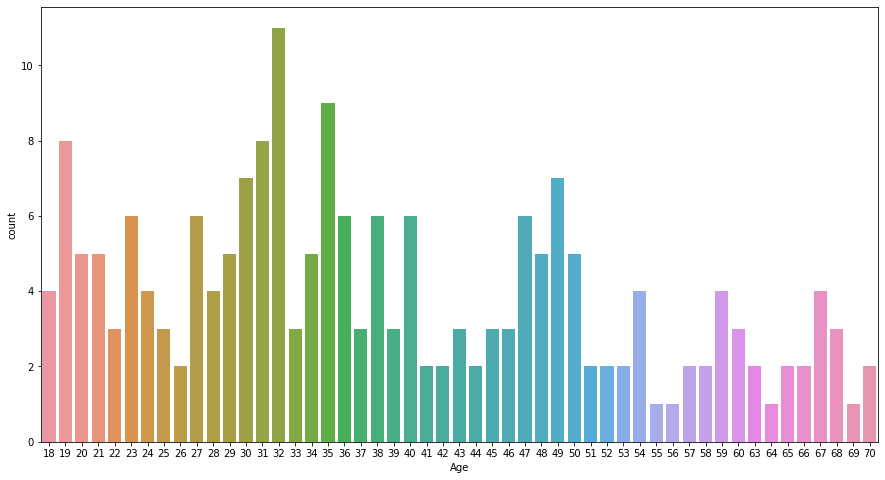

In [9]:
plt.figure(figsize=(15,8))
sb.countplot(data=df,x='Age')

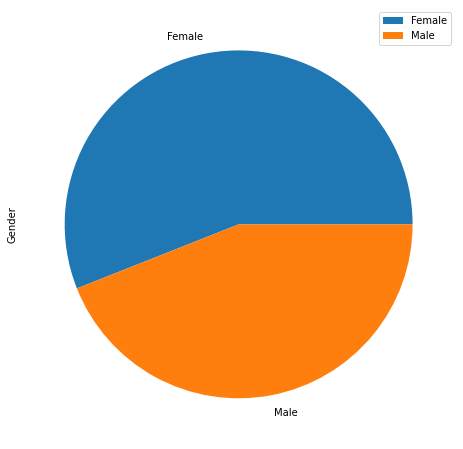

In [10]:
plt.figure(figsize=(8,8))
df.Gender.value_counts().plot.pie()
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of annual income')

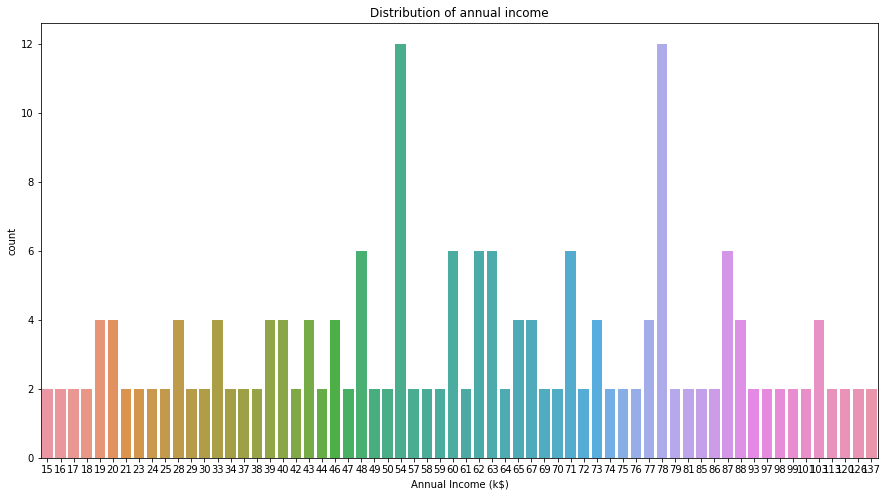

In [11]:
## Distribution of income
plt.figure(figsize=(15,8))
sb.countplot(df['Annual Income (k$)'],data=df)
plt.title("Distribution of annual income")

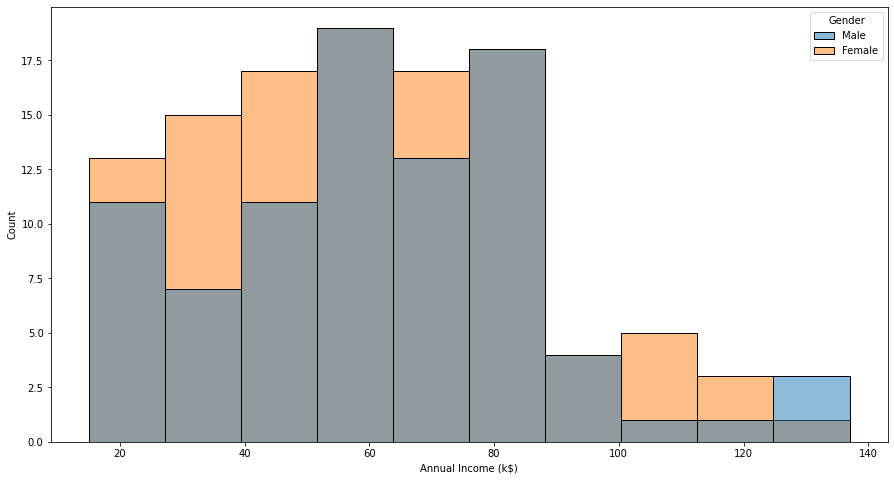

In [12]:
## show the annual income distribution w.r.t the gender
plt.figure(figsize=(15,8))
sb.histplot(df,x='Annual Income (k$)',hue='Gender')

In [13]:
## Feature Engineering
## Label encoder

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()


In [14]:
df.Gender=enc.fit_transform(df.Gender)

In [15]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [16]:
df.drop('CustomerID',axis=1,inplace=True) ## customerID is not required it just doesn't make sense to the model so dropping it.

In [17]:
## Choosing k value

lst=[]
for i in range(1,11):
  kmodel= KMeans(n_clusters=i,n_init=15)  ## n_init -> update iteration 
  kmodel.fit(df)
  lst.append(kmodel.inertia_)


In [18]:
lst

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75427.71182424155,
 58348.641363315044,
 51132.703212576904,
 44389.80767355766,
 40887.37902356903,
 37197.80558282297]

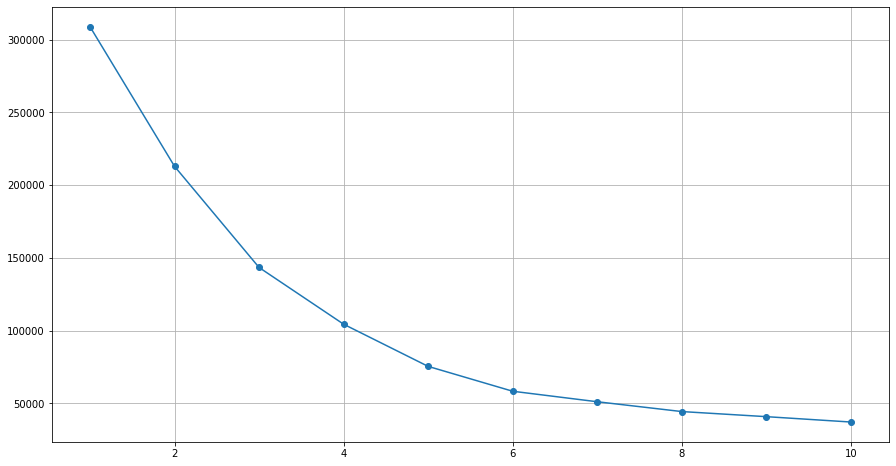

In [19]:
## plotting for best value of k
plt.figure(figsize=(15,8))
plt.plot(range(1,11),lst,marker='o')
plt.grid()

6 is the best k(Number of clusters.) value.

In [20]:
## finally making the model
kmodel=KMeans(n_clusters=6)

In [21]:
## Training the model
kmodel.fit(df)

KMeans(n_clusters=6)

In [22]:
## prediction
prediction=kmodel.predict(df)

In [23]:
## cetroids in each cluster
kmodel.cluster_centers_

array([[ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895]])

In [24]:
# length  of clusters we made 6 clusters already just to know
len(kmodel.cluster_centers_)

6

In [25]:
df['cluster']=prediction

In [29]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,3
4,0,31,17,40,2
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,0
197,1,32,126,74,1
198,1,32,137,18,0


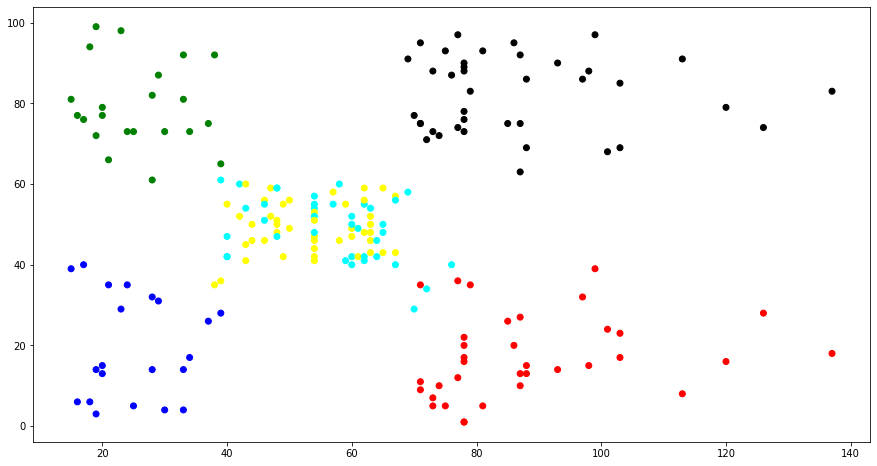

In [34]:
## visualize the clusters with annual income and spendind score
color=np.array(['red','black','blue','green','yellow','cyan'])
plt.figure(figsize=(15,8))
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'], c= color[kmodel.labels_])

In [40]:
## Making the dendrogram plot to visualize the clusters.

from scipy.cluster.hierarchy import dendrogram,linkage

In [41]:
var= linkage(df,method='ward')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

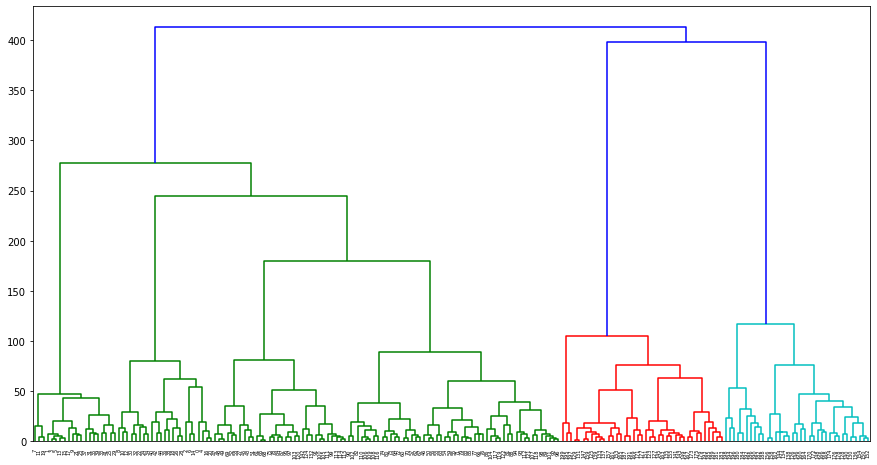

In [42]:
plt.figure(figsize=(15,8))
dendrogram(var)